# Topic Modeling - LDA

For this project you will be working with a dataset of around 12,000 Articles that have no labeled cateogry, and attempting to find 20 cateogries to assign these articles to. 

**Libraries used** - sklearn, pandas, re, spacy, string, wordcloud, matplotlib, numpy, LatentDirichletAllocation

# 1 - Data Pre-processing

Below are the high level steps:

1. **Getting the data -** in this case, we are provided with the dataset in the csv file.
2. **Cleaning the data -** we will walk through popular text pre-processing techniques
3. **Organizing the data -** we will organize the cleaned data into a way that is easy to input into other algorithms

The output of this step will be clean, organized data in two standard text formats:

1. **Corpus** - a collection of text
2. **Document-Term Matrix** - word counts in matrix format

1.1 **Getting the data -** in this case, we are provided with the dataset in the csv file.

In [54]:
import pandas as pd

In [55]:
data_df = pd.read_csv('~/data/npr.csv')

data_df = data_df.head(100) #For testing we are taking a sample of 50 articles

In [56]:
data_df.shape # There are total 11992 articles.

(100, 1)

Let's view the Articles dataset.

In [57]:
data_df.head()

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


Let's take a look at one of the article.

In [58]:
data_df['Article'][3]

'Updated at 2:50 p. m. ET, Russian President Vladimir Putin says Russia won’t be expelling U. S. diplomats in a    response to U. S. sanctions, as his foreign minister had suggested earlier Friday. Instead, he says he will decide how to move forward depending on the actions of   Donald Trump’s administration. Trump took to Twitter on Friday afternoon to praise Putin’s decision, calling it a ”great move.” On Thursday, the White House announced sanctions against Russia in response to what it called ”a   campaign of   operations” against the U. S.  —   including actions meant to interfere with the U. S. presidential election. On Friday, Russian Foreign Minister Sergey Lavrov went on state TV and called the sanctions ”antics” that Russia can’t leave unanswered. He said the U. S. provided no evidence for its claims of Russian cyber operations, NPR’s Lucian Kim reports. ”The Kremlin has consistently denied accusations that its hackers had broken into the Democratic National Committee or trie

- As we see each of the records represents an Article.
- The field "Article" contains the entire Article text for the respective article.
- There is no labeled column to know what this article is about.

1.2 **Cleaning the data -** in this case, we are provided with the dataset in the csv file.

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate. Here are a bunch of things you can do to clean your data. We're going to execute just the common cleaning steps here and the rest can be done at a later point to improve our results.

**Common data cleaning steps on all text:**
* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words

**More data cleaning steps after tokenization:**
* Stemming / lemmatization
* Parts of speech tagging
* Create bi-grams or tri-grams
* Deal with typos
* And more...

In [59]:
# Perform standard imports:
import spacy
nlp = spacy.load('en_core_web_sm')

In [60]:
# THIS CELL FOR RANDOM TESTING
import re
import string

text_in = data_df['Article'][3]
#text_in = 'This is a sample text. In 1950s it happened and a declaration was made on 2019. It took several years to have an conclusion, but this year it was completed.'

text_out = ''
text_in = text_in.lower()


#text_in = re.sub('\[.*?\]', '', text_in)
#text_in = re.sub('[%s]' % re.escape(string.punctuation), '', text_in)
text_in = re.sub('\w*\d\w*', '', text_in) #Remove words containing numbers 
#text_in = re.sub('[‘’“”…]', '', text_in)
#text_in = re.sub('-', '', text_in)
#text_in = re.sub('—   ', '', text_in)
text_in = re.sub('\n', '', text_in)
    
doc = nlp(text_in)

for token in doc:
    #print(token.text, end=' | ')
    
    #if (token.pos_ == 'NOUN' or token.pos_ == 'PROPN'):
    
        print(f'{token.text:{20}} {token.pos_:{8}} {token.tag_:{6}} {token.lemma_:{20}} {spacy.explain(token.tag_)}')
    
    #text_out = text_out + ' ' + token.text

#print(text_out)

for chunk in doc.noun_chunks:
    print(chunk.text)

updated              VERB     VBN    update               verb, past participle
at                   ADP      IN     at                   conjunction, subordinating or preposition
:                    PUNCT    :      :                    punctuation mark, colon or ellipsis
p.                   NOUN     NN     p.                   noun, singular or mass
m.                   NOUN     NN     m.                   noun, singular or mass
et                   X        FW     et                   foreign word
,                    PUNCT    ,      ,                    punctuation mark, comma
russian              ADJ      JJ     russian              adjective
president            NOUN     NN     president            noun, singular or mass
vladimir             NOUN     NN     vladimir             noun, singular or mass
putin                NOUN     NN     putin                noun, singular or mass
says                 VERB     VBZ    say                  verb, 3rd person singular present
russia  

p. m.
russian president vladimir putin
russia
s. diplomats
a    response
u. s. sanctions
his foreign minister
he
he
the actions
donald trump’s administration
trump
friday afternoon
putin’s decision
it
thursday
the white house
sanctions
russia
response
what
it
operations
the u. s.
actions
the u. s. presidential election
friday
russian foreign minister sergey
state tv
the sanctions
that russia
he
the u. s.
no evidence
its claims
russian cyber operations
npr’s lucian kim reports
the kremlin
accusations
its hackers
the democratic national committee
the u. s. election
” lucian notes
he
specific counteractions russia
we
president obama’s executive order
russian diplomats
the white house
intelligence operatives
the u. s.
two russian facilities
the u. s.
sanctions
several russian individuals
organizations
obama’s statement
more actions
plans
russia
moscow
lavrov’s plan
putin’s approval
american diplomats
u.
diplomats
access
two buildings
russian diplomats
two retreats
maryland
new york
’s comm

In [61]:
# Create a Doc object and explore tokens
#mystring = data_df['Article'][77]
import re

def text_preprocess(text_in):
    text_out = ''
    text_in = text_in.lower()   # Convert to lower case
    text_in = re.sub('\w*\d\w*', '', text_in)
    doc = nlp(text_in)
    
    for token in doc:
        #print(token.text, end=' | ')
        if (token.pos_ == 'NOUN' or token.pos_ == 'PROPN' or token.pos_ == 'ADJ'):
            #print(token.text + ' ---> ' + token.pos_)
            text_out = text_out + ' ' + token.lemma_ #token.text
    return text_out

text_preprocess_apply = lambda x: text_preprocess(x)

In [62]:
%%time
# Let's take a look at the updated text
data_clean_df = pd.DataFrame(data_df.Article.apply(text_preprocess_apply))
data_clean_df.head()

CPU times: user 27.9 s, sys: 1.36 s, total: 29.3 s
Wall time: 26.5 s


,Article
0,washington policy bipartisan politic sense ye...
1,donald trump twitt preferred mean communicati...
2,donald trump russian president vladimir putin...
3,p. m. russian president vladimir putin russia...
4,photography illustration video datum visualiz...


In [63]:
data_clean_df['Article'][4]

' photography illustration video datum visualization immersive experience visual important part storytelling npr interwoven spoken word image visual language deep understanding empathy struggle triumph lot story more ’s small selection favorite piece work proud big story story fun mountain national park sight immersive geology lesson oregon state university geology professor eric kirby geologic history rockie video today indian less energy person american chinese people many population day people electricity night refrigerator car ambitious goal standard living people reliable electricity energy supply time ajay mathur climate expert energy resource institute new delhi fast india clean energy solar wind country use coal todd stern last month top u. s. envoy climate change india steep hill other country country big challenge number people level economic growth number people access electricity ’s sacred dead yamuna river india ’s big battle development pollution india ’s sundarban people

- Now data looks clean of punctuation, numbers etcc.

1.3 **Organizing the data -** 

The output will be organized data in two standard text formats:

1. **Corpus** - a collection of text
2. **Document-Term Matrix** - word counts in matrix format

**Corpus**

- The definition of a corpus is a collection of texts.
- We already have the data in Corpus, and they are all put together neatly in a pandas dataframe here, so no further operation needed.

In [64]:
data_clean_df.head()

,Article
0,washington policy bipartisan politic sense ye...
1,donald trump twitt preferred mean communicati...
2,donald trump russian president vladimir putin...
3,p. m. russian president vladimir putin russia...
4,photography illustration video datum visualiz...


**Document-Term Matrix**

- The text must be tokenized, meaning broken down into smaller pieces.
- The most common tokenization technique is to break down text into words.
- We can do this using scikit-learn's CountVectorizer, which tokenizes all the words in all the documents.
- In addition, with CountVectorizer, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.
- Using the CountVectorizer we can generate a Document Term Matrix,where every row will represent a different document and every column will represent a different word.

In [65]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
# Instantiate CountVectorizer with required hyperparameters
# max_df (0.9) => Pick only Words that shows up in 90% of documents
# min_df (2)   => Pick only Words that shows up atleast in 2 documents.
# Remove Stopwords
# We can use Spacy to tokenize and remove stopwords but Countvectorizer does everything for us.

cv = CountVectorizer(max_df=0.9,min_df=2,stop_words='english')

In [67]:
%%time
# Create Document Term Matrix by Fitting the CountVectorizer
dtm_csr = cv.fit_transform(data_clean_df['Article'])

CPU times: user 62.5 ms, sys: 0 ns, total: 62.5 ms
Wall time: 117 ms


In [68]:
# It creates a sparse matrix with Number of Articles (Documents) (404289) and Number of words (Terms) (38669)
# Sparse data structures allow us to store only non-zero values assuming the rest of them are zeros. 
# This approach saves a lot of memory and computing time.

dtm_csr

<100x2412 sparse matrix of type '<class 'numpy.int64'>'
	with 12072 stored elements in Compressed Sparse Row format>

In [69]:
%%time
# Convert the Sparse matrix into a Dataframe to print and visualize
dtm_df = pd.DataFrame(dtm_csr.toarray(), columns=cv.get_feature_names())
dtm_df.index = data_clean_df.index
dtm_df.head()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.46 ms


,abc,ability,able,absence,absolute,abstention,abundance,abundant,abuse,aca,...,worth,writer,writing,wrong,year,yellow,york,young,zika,zone
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,10,0,0,0,1,0


In [70]:
type(cv.get_feature_names()) # This is a list of all the words in all the documents

list

In [71]:
len(cv.get_feature_names())

2412

# 2 - Exploratory Data Analysis

After the Data Preprocessing step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each article:

1. **Most common words** - Top 15 words in each article
2. **Visualization using WordClouds** - Visualize to inspect if words make sense after preprocessing.
3. **Size of vocabulary** - look number of unique words in each article.

#### Note - After concluding this step if we feel the data is not ready for modeling or requires more processing, then we can go back to Pre-precessing step.


### 2.1 Most common words

#### Objective
- Get the Top words (in this case top 15) for each article.

In [72]:
# Transpose the DTM dataframe
tdm_df = dtm_df.transpose()
tdm_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
abc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,1,0,0,0,0,0,1,0,1,0,...,2,0,0,0,0,0,0,1,0,0
able,0,0,0,1,1,0,1,0,2,0,...,0,1,0,1,0,0,3,0,0,0
absence,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolute,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Find the top 15 words said by each article
top_dict = {}
for c in tdm_df.columns:
    top = tdm_df[c].sort_values(ascending=False).head(15)
    top_dict[c]= list(zip(top.index, top.values))

In [74]:
len(top_dict)

100

In [75]:
# Print the top 15 words in each document
for article, top_words in top_dict.items():
    print(article)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

0
trump, russian, intelligence, russia, obama, week, putin, sanction, republican, president, year, committee, interference, campaign
---
1
trump, china, nuclear, tweet, administration, weapon, time, policy, country, israeli, issue, morning, settlement, campaign
---
2
trump, putin, russia, obama, country, president, leader, praise, russian, action, sanction, foreign, policy, clinton
---
3
russian, putin, diplomat, russia, action, obama, sanction, trump, response, friday, president, administration, foreign, facility
---
4
people, school, year, big, party, country, number, police, world, olympic, stop, refugee, npr, pipeline
---
5
brain, class, leg, function, science, teacher, different, review, disease, internal, lot, thing, right, organ
---
6
brain, year, drug, neuroscience, trial, university, finding, social, disease, work, group, immune, patient, treatment
---
7
refugee, edward, america, new, room, airport, country, family, claire, food, camp, teacher, apartment, lesson
---
8
communic

### 2.2 Visualization (Word Cloud)

#### Objective
- The purpose of this visualiazation step is to, inspect each of the article after preprocessing and see if it make sense.
- Data should look cleaner, stopwords removed and frequent words (highlighted words) should give some idea about the underlying topic.


In [76]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Instantiate WordCloud with approprate hyperparameter
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

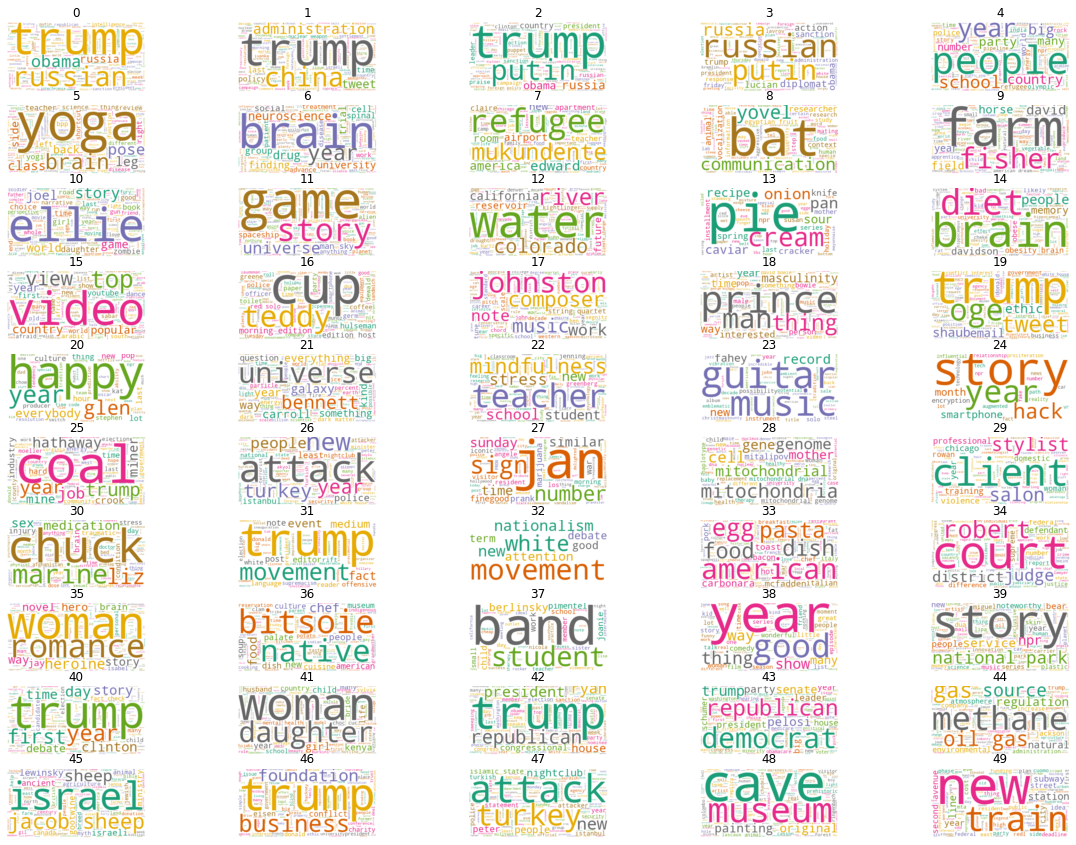

CPU times: user 15.9 s, sys: 15.9 s, total: 31.8 s
Wall time: 33.5 s


In [77]:
%%time
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each article
for idx in data_clean_df.loc[0:49].index: 

    doc_text = data_clean_df['Article'][idx]
    
    wc.generate(doc_text)
    
    plt.subplot(10, 5, idx+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(idx)

plt.show()

#### Findings

- The purpose of this visualiazation step is to, inspect each of the article after preprocessing and see if it make sense.
- Data looks cleaner, with no stopwords and more meaningful words are highlighted which can give some idea about the underlying topic.
- "trump" is a common word in many articles e.g article numbers 0,1,2,19,46, hence these articles can be grouped together.


### 2.2 Size of Vocabulary

#### Objective
- Get the Number of Unique words for each article.

In [78]:
# Find the number of unique words for each document

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
vocab_list = []
for idx in tdm_df.columns:
    uniques = tdm_df[idx].nonzero()[0].size # number of non-zero columns
    totals = sum(tdm_df[idx])
    
    vocab_tuple = (idx, uniques, totals)
    vocab_list.append(vocab_tuple)
    #print(str(idx) + ' : ' + str(uniques) + ' : ' + str(totals))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


In [79]:
vocab_df = pd.DataFrame(vocab_list, columns = ['Article_ID' , 'Unique_Words', 'Total_Words'])
vocab_df.head()

,Article_ID,Unique_Words,Total_Words
0,0,232,401
1,1,122,198
2,2,155,297
3,3,74,131
4,4,352,561


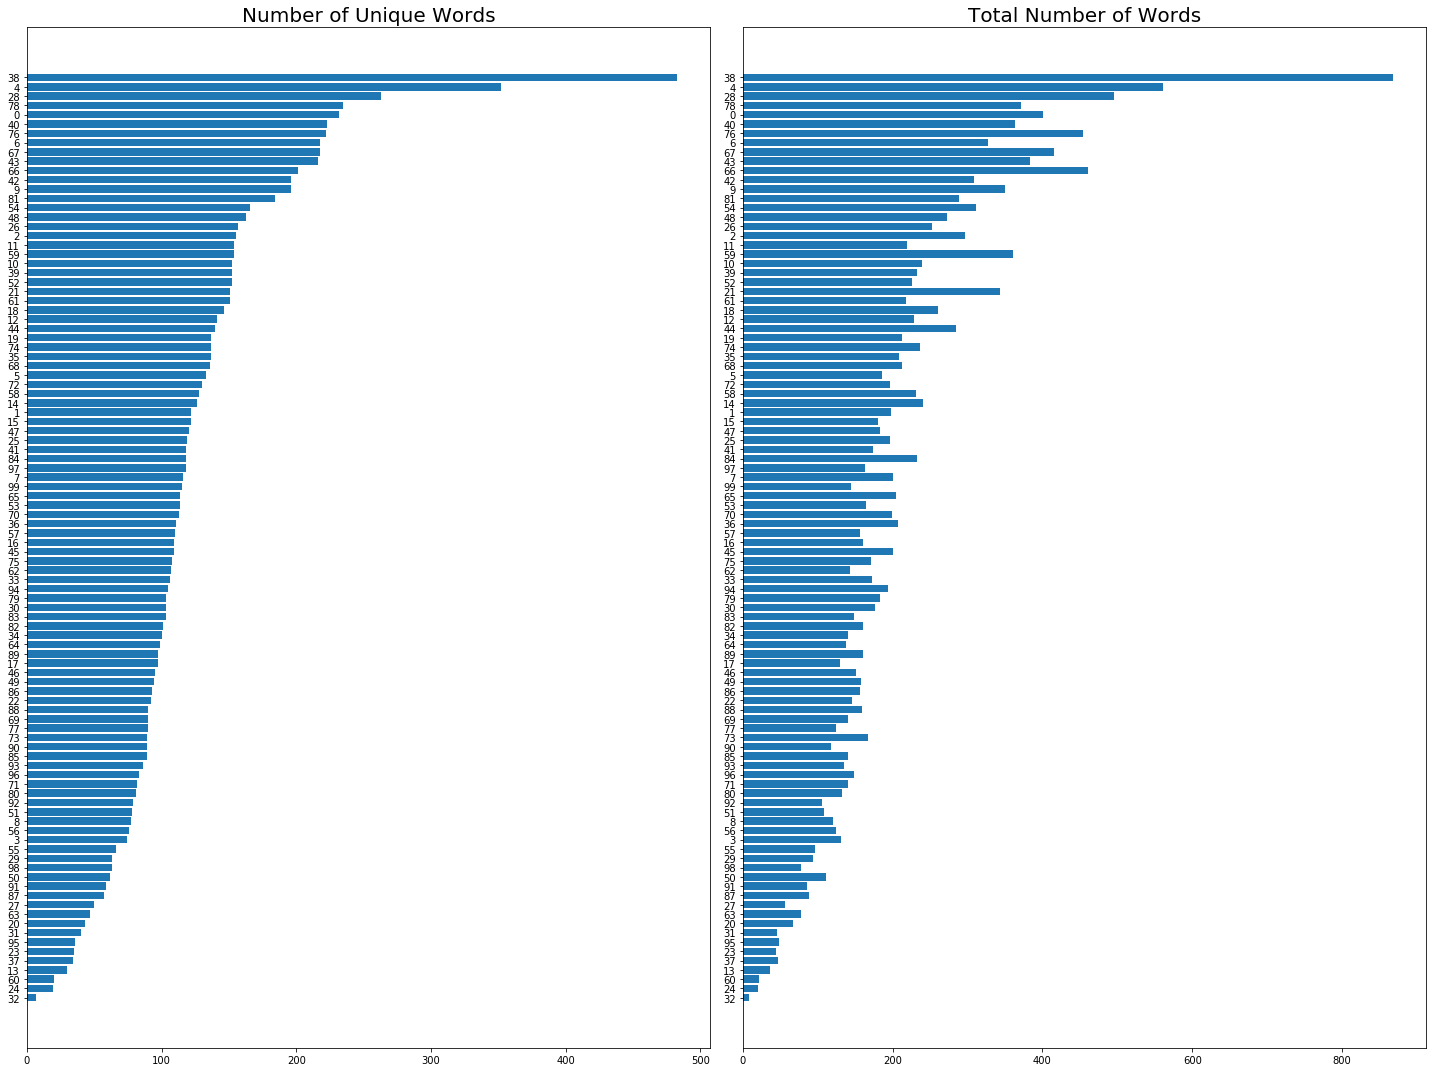

In [80]:
# Let's plot our findings
import numpy as np

vocab_sort_df = vocab_df.sort_values(by='Unique_Words')
y_pos = np.arange(len(vocab_df))

plt.subplot(1, 2, 1)
plt.barh(y_pos, vocab_sort_df.Unique_Words, align='center')
plt.yticks(y_pos, vocab_sort_df.Article_ID)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, vocab_sort_df.Total_Words, align='center')
plt.yticks(y_pos, vocab_sort_df.Article_ID)
plt.title('Total Number of Words', fontsize=20)

plt.tight_layout()
plt.show()

#### Findings

- Document number 38,4,28 have lot of unique words in the corpus (collection of documents).
- Document number 32,24,13 have smaller vocabulary.


# 3 - Modeling

#### Objective 
- **Latent Drichlet Allocation** algorithm will be used for Topic Modeling


#### Steps
- 1) Define the Model with appripriate hyperparameters.
- 2) Fit the Model with DTM.
- 3) Get the Vocabulary of Words.
- 4) Get the topics.
- 5) Get the highest probability words per topic.
- 6) Attach Topic Numbers to each of the articles.

#### 1) Define the Model with appripriate hyperparameters.

In [81]:
from sklearn.decomposition import LatentDirichletAllocation

In [82]:
# n_components => We want 3 general topics here.
# random_state => Some random number

topic_model = LatentDirichletAllocation(n_components=3,random_state=42)

#### 2) Fit the Model with DTM

In [83]:
%%time
topic_model.fit(dtm_csr)

CPU times: user 1.12 s, sys: 15.6 ms, total: 1.14 s
Wall time: 597 ms


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=3, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

#### 3) Get the Vocabulary of Words

In [84]:
# "get_feature_names()"" method returns a list containing all the words from "CountVectorizer"

len(cv.get_feature_names()) #List of all the words in all the documents

2412

In [85]:
cv.get_feature_names()[2000] # we can print words given a position index

'smith'

#### 4) Get the topics

In [86]:
# This returns a numpy array.
type(topic_model.components_)

numpy.ndarray

In [87]:
# Total Number of Topics.
len(topic_model.components_)

3

In [88]:
# It returns a Numpy array of "Number of Topics" and "Probability of each of the words in that topic".
topic_model.components_.shape

(3, 2412)

In [89]:
# The array contains Probability of each words in those Topics
topic_model.components_

array([[ 0.33334853,  1.49084357, 14.31733497, ...,  6.38086099,
         0.3333477 ,  2.32758007],
       [ 1.33337947,  8.23855074, 11.85064734, ..., 24.44468938,
         0.33647701,  0.33335143],
       [ 2.33327201,  3.27060568,  6.8320177 , ...,  3.17444962,
         2.33017529,  0.3390685 ]])

#### 5) Get the highest probability words per topic

Let's understand how it works for a single topic first. After that we will generalize this for all topics.

In [90]:
single_topic = topic_model.components_[0] # Let's get the first topic

In [91]:
# This will print the array of Probability of each of the 54777 words for the First Topic
single_topic

array([ 0.33334853,  1.49084357, 14.31733497, ...,  6.38086099,
        0.3333477 ,  2.32758007])

In [92]:
# Sort the Array using "argsort" by index positions from Least to Greatest value.
# First index position word i.e 2475th word in the array has the least probability.
# Last index position word i.e 42993rd word in the array has the highest probability.
single_topic.argsort()

array([1037,  541,  737, ..., 1432, 2209, 2406])

In [93]:
# ARGSORT => Index positions sorted from Least to Highest
# Top 10 Values (10 Greatest Values) => Last 10 values of ARGSORT()
top_ten_words_index = single_topic.argsort()[-10:]
top_ten_words_index

array([2399,  154, 2360,  623,  891, 1564, 2296, 1432, 2209, 2406])

In [94]:
# Print the Top 10 words for first topic (index : probability " word")
for index in top_ten_words_index:
    print(str(index) + ' : ' + str(single_topic[index]) + ' : ' + cv.get_feature_names()[index])

2399 : 36.13625696157253 : world
154 : 36.36389822690868 : attack
2360 : 37.24428174058972 : way
623 : 41.34308026801353 : diet
891 : 43.1611113499856 : game
1564 : 49.04904387697514 : people
2296 : 51.33244335407435 : universe
1432 : 55.86045630120698 : new
2209 : 57.21635136778728 : time
2406 : 88.30579594778031 : year


Now generalize the above logic for all the topics

In [95]:
%%time
for index,topic in enumerate(topic_model.components_):
    print(f"THE TOP 15 WORDS FOR TOPIC # {index}")
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n\n')
    

THE TOP 15 WORDS FOR TOPIC # 0
['city', 'good', 'news', 'cave', 'water', 'world', 'attack', 'way', 'diet', 'game', 'people', 'universe', 'new', 'time', 'year']



THE TOP 15 WORDS FOR TOPIC # 1
['lot', 'story', 'school', 'good', 'brain', 'new', 'american', 'child', 'university', 'woman', 'way', 'time', 'thing', 'people', 'year']



THE TOP 15 WORDS FOR TOPIC # 2
['day', 'election', 'congress', 'senate', 'democrat', 'country', 'time', 'people', 'obama', 'new', 'house', 'republican', 'president', 'year', 'trump']



CPU times: user 62.5 ms, sys: 0 ns, total: 62.5 ms
Wall time: 64 ms


In [96]:
# Create Topic Dictionary
topic_dict = {0:'topic_0',1:'topic_1',2:'topic_2',3:'topic_3',4:'topic_4',5:'topic_5',6:'topic_6'}

#### 6) Attach Topic Numbers to each of the articles.

Probability of a Document belonging to a Particular Topic

In [97]:
%%time
topic_probability_arr = topic_model.transform(dtm_df)

CPU times: user 125 ms, sys: 0 ns, total: 125 ms
Wall time: 63.6 ms


In [98]:
# Above step returns a numpy array containing
type(topic_probability_arr) 

numpy.ndarray

In [99]:
# The array contains probability of all the topics and respective probability of belonging to a particular topic.
topic_probability_arr.shape

(100, 3)

In [100]:
# Array containing the Probabilities(rounded to 2 decimal places) of 1st Article belonging to each of the 7 topics.
topic_probability_arr[0].round(3)

array([0.001, 0.001, 0.998])

In [101]:
# Lets get the index position of the highest probability
topic_probability_arr[0].argmax(axis=0)

2

In [102]:
# Create a New Field called "Topic" and attach the Topic Number
data_df['Topic'] = topic_probability_arr.argmax(axis=1)

In [103]:
data_df.head()

,Article,Topic
0,"In the Washington of 2016, even when the polic...",2
1,Donald Trump has used Twitter — his prefe...,2
2,Donald Trump is unabashedly praising Russian...,2
3,"Updated at 2:50 p. m. ET, Russian President Vl...",2
4,"From photography, illustration and video, to d...",2


In [104]:
data_df['Topic_Label'] = data_df['Topic'].map(topic_dict)

In [105]:
data_df #.head()

,Article,Topic,Topic_Label
0,"In the Washington of 2016, even when the polic...",2,topic_2
1,Donald Trump has used Twitter — his prefe...,2,topic_2
2,Donald Trump is unabashedly praising Russian...,2,topic_2
3,"Updated at 2:50 p. m. ET, Russian President Vl...",2,topic_2
4,"From photography, illustration and video, to d...",2,topic_2
5,I did not want to join yoga class. I hated tho...,1,topic_1
6,With a who has publicly supported the debunk...,1,topic_1
7,"I was standing by the airport exit, debating w...",2,topic_2
8,"If movies were trying to be more realistic, pe...",1,topic_1
9,"Eighteen years ago, on New Year’s Eve, David F...",0,topic_0


In [106]:
data_df['Article'][4]

'From photography, illustration and video, to data visualizations and immersive experiences, visuals are an important part of our storytelling at NPR. Interwoven with the written and the spoken word, images  —   another visual language  —   can create deeper understanding and empathy for the struggles and triumphs we face together. We told a lot of stories in 2016  —   far more than we can list here. So, instead, here’s a small selection of our favorite pieces, highlighting some of the work we’re most proud of, some of the biggest stories we reported, and some of the stories we had the most fun telling. Transport yourself to Rocky Mountain National Park, with all its sights and sounds, in an immersive geology lesson with Oregon State University geology professor Eric Kirby, who discusses the geologic history of the Rockies in   video. ”Today, Indians use much less energy per person than Americans or Chinese people. Many of its 1. 2   population live on roughly $2 a day. But what if all